# Computational Solutions of the Time Independent Schrodinger Equation for Infinite Well Potentials

This python notebook explores numericals solutions to the Time Independent Schrodinger Equation (TISE) using the Runge-Kutta algorithm and Secant Method.
This can be seen by expressing the TISE as 2 coupled 1st order differential equations, namely (Dash, 2020)

1.
$$ \frac{d\psi}{dx} = \phi $$

2.
$$ \frac{d\phi}{dx} = \frac{2m}{\hbar^2}[V(x) - E]\psi(x) $$

Which is in a form solvable by Runge-Kutta methods. In the first section, we look at the case of an electron in an infinite square well. The potential of this system is given by 

3.
$$ V(x) = \begin{cases} 0 & \text{if } -a < x < a  \\ 
\infty & \text{if } x > a,x < a \end{cases} 
$$

where a is the half-width of the square well. 
The code will first solve for numerical values of $\psi(x)$ by iterating over a range of x-values over the part of the potential where V = 0, using the initial boundary condition $\psi(-a) = 0 $.

An estimate of the ground state energy can then be done using the 'Secant Method'. The Secant Method is a method which approximates the roots of a given function. For example, for a function which maps $x$ to $f(x)$, the secant method finds the roots of f(x) (where f(x)=0) by using 

4.
$$
x' = x - \Delta x = x - \frac{f(x)}{f'(x)}.
$$

This is iterated over updated different values of x until $ \Delta x $ converges to the required accuracy needed. Provided that $ f'(x) $ is not known, it may be approximated by using 2 values of x ie. $x_1$ and $x_2$ and finding the rough gradient by 

5.
$$
f'(x_2) \approx \frac{f(x_2) - f(x_1)}{x_2 - x_1}
$$

This can be substituted to yield a third point of x (Faires, 2011, p.11) which forms the guess for where the root is, ie. 

6.
$$
x_3 = x_2 - f(x_2) \frac{x_2 - x_1}{f(x_2) - f(x_1)},
$$

$x_1$ and $x_2$ are then replaced with $x_2$ and $x_3$ and this process is continuously repeated until a sufficient answer is found. 


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 3.1 
## Infinite Square Well (1-dimensional)
We first define the parameters of the system, ie. square well width, mass of particle, electron charge etc. 

In [2]:
#define required constants 
m = 9.109383702e-31 #electron mass (kg)
hbar = 1.054571817e-34 #hbar value (Js^1)
e = 1.602176634e-19 #electron charge (C)
d = 5e-9 #infinite square well width (m)
a = d/2 #half length of square well

Next the potential inside the square well and the RHS of the coupled differential equation is defined for use of the Runge-Kutta Method

In [3]:
def potential(x):
    
    """This function defines the potential inside the square well. In this is instance just V(x)=0 for all x
       Inputs: x-values 
       Output: Potential energy at given x-value"""
    
    return 0

In [4]:
def tisefunction(x,r,E):
    
    """This function calculates the RHS of the differential equation of the TISE for an infinite square well potential
       Inputs: r: (2 valued array of psi and phi, the wavefunction and wavefunction derivative respectively)
               x: displacement (m)
               E: energy eigenvalues of the quantum system """
    
    #defines wavefunction psi, derivative of psi
    psi = r[0]
    phi = r[1]
    
    #defines RHS of 2 differential equations
    f_1 = phi
    f_2 = (2*m/hbar**2)*(potential(x)-E)*psi
    
    return np.array([f_1,f_2],float)

Before defining the Runge-Kutta computation function, the range of x-values are chosen. This is set between $x = -a $ and $x = a$ so that the square well is centered on the point $x=0$

In [5]:
#define range of x values
x_i = -a
x_f = a
step = (x_f - x_i) / 2000
x_range = np.arange(x_i, x_f, step)

The Runge-Kutta code is written below. This includes an additional input E, which is the energy of the system. This will be useful when trying to compute the ground state of energy using the Secant method next. 
In the output, the values of $ \phi $ are also omitted. This is because we are not interested in the derivatives of $\psi(x)$ directly and are trying to meet the second boundary condition $\psi(a)=0$ by iteratively varying energy. 

In [6]:
def RungeKutta(r_value,x_values, xstep, E, function):
    
    """This function calculates numerical solutions to a two dimensional vector differential equation using the 
       4th order Runge-Kutta method generalized to multiple variables
       Inputs: inital variable values, time datapoints, RHS of differential equations(in array form), E (energy value)
       Outputs: wavefunction psi values for each point of data in x-value"""
    
    #arrays of psi and phi values to be filled
    psi_values = []
    phi_values = []
    
    for x in x_values:
        
        #first append new values for arbitrary datapoint of time
        psi_values.append(r_value[0])
        phi_values.append(r_value[1])
        
        #Runge-Kutta computation (adapted from "PHAS0029-C7-instructions.ipynb")
        k_1 = xstep * function(x,r_value,E) 
        k_2 = xstep * function(x + 0.5*xstep, r_value + 0.5*k_1,E)
        k_3 = xstep * function(x + 0.5*xstep, r_value +0.5*k_2,E)
        k_4 = xstep * function(x + xstep, r_value + k_3,E)
        r_value = r_value + (k_1 + 2*k_2 + 2*k_3 + k_4)/6
    
    #append last value at psi(a)
    psi_values.append(r_value[0])
    
    return np.array(psi_values, float)

#### Use of Secant Method 
Using our numerical computation with the Runge-Kutta function, we have specified that we have one boundary condition $\psi(-a)=0$. However this does not guarantee the solution is valid for the second boundary condition $\psi(a) =0$. To find numerical values of $\psi$ which satisfy the second boundary condition. We try to find values of E which satisfy $\psi(a)=0$. This can be done with the secant method since values of $\psi(a) $ vary as some function of E. We can try and find E which causes $\psi(a)=0$ -  which corresponds to finding the roots of $\psi(a) $ as a function of E.

In [7]:
#initial energy, value of psi and phi (x=-a) 
E1 = 0
E2 = 0.03*e
initial_r = np.array([0,1e9],float)

#psi solutions using first guesses
sol1 = RungeKutta(initial_r, x_range, step, E1, tisefunction)
psia1 = sol1[2000] #value of psi at x=a
sol2 = RungeKutta(initial_r, x_range, step, E2, tisefunction)
psia2 = sol2[2000]

# tolerance of satisfactory convergence
tolerance = e/1e7

while abs(E2-E1) > tolerance: #condition of accuracy 
    E3 = E2 - psia2*(E2-E1)/(psia2-psia1)  
    
    # update energy in the next iterative computation
    E1 = E2 
    E2 = E3 

    # recalculate psi value at x=a, using new energies
    psia1 = RungeKutta(initial_r,x_range,step,E1, tisefunction)[2000]
    psia2 = RungeKutta(initial_r, x_range,step, E2, tisefunction)[2000]

print(f'The calculated ground state energy is {E2/e} eV')

The calculated ground state energy is 0.015041206485411374 eV


The ground state energy found is printed to check and returns a value which is reasonable. One aspect to note is that the initial value of $ \phi $ has no effect on the eigenenergies found. We may plot the wavefunction solution formed and compare to the analytic value of the ground state energy found. This is calculated by 

7.
$$ E_0 = \frac{\pi^2\hbar^2n^2}{8ma^2} $$

The analytical ground state energy is 0.0150412064854 eV
The numerically solved ground state energy is 0.0150412064854 eV



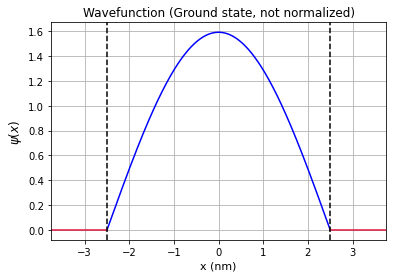

In [8]:
#analytical value of ground state energy
E0 = (np.pi*hbar)**2 / (2*m*d**2)

print(f'The analytical ground state energy is {E0/e:0.12} eV' )
print(f'The numerically solved ground state energy is {E2/e:0.12} eV')
print()

#x values for psi 
x_minus = np.linspace(-1e-6*1e9,-a*1e9,300)
x_plus = np.linspace(a*1e9,1e-6*1e9,300)
x_well = np.arange(-a,a+0.1*step, step)

#plots the wavefunction of electron in infinite square well potential
plt.figure()
plt.title('Wavefunction (Ground state, not normalized)')
plt.plot(x_well*1e9, RungeKutta(initial_r, x_range, step, E2,tisefunction), color='blue')
plt.plot(x_minus,len(x_minus)*[0], color='crimson')
plt.plot(x_plus,len(x_plus)*[0], color='crimson')
plt.axvline(-a*1e9,0,1e5,ls='--',color='black')
plt.axvline(a*1e9,0,1e5,ls='--',color='black')
plt.xlabel('x (nm)', fontsize = 11)
plt.ylabel(f'$\psi(x)$', fontsize = 12)
plt.xlim(-1.5*a*1e9,1.5*a*1e9)
plt.grid(True)

The numerically approximated ground state energy and analytical ground state energy is found to be in very precise agreement using the tolerance defined in the code. The precision can likely easily be improved by using even smaller tolerance. Moreover, using the found energy, this produced a symmetric wavefunction over the square potential which is also expected due to both the symmetry of the well but also holds the same form as the analytic solution of the ground state wavefunction. 

The secant method was sensitive to initial conditions of varying energy. This is likely more reflective of the fact that energy eigenvalues which satisfy $ \psi(a) = 0 $ are infinite in nature for analytical values and even changing initial guess of E1 to 0.04 eV and E2 = 0.07 eV (from E1 = 0, E2 = 0.03 eV) will converge the system to the first excited state instead of the ground state energy.

Although convergence of ground state energies were not dependent on initial values of $ \phi $, this did have direct effect on the numerical values of the wavefunction solution. By changing initial $ \phi $, one can observe the values of the graph shift significantly depending on what values are substituted. 

## 3.2. Ground State Wavefunction Solution, Normalization
In order to produce a correct wavefunction solution to the system, we must also ensure the wavefunction is normalized such that 

8.
$$ \int_{-\infty}^{\infty} |\psi(x)|^2 \,dx = 1  $$

As mentioned previously, the initial value of $ \phi $ changes the numerical values of $ \psi(x) $ for solutions to the system. To normalize, it is possible to calculate the integral of the square magnitude of $ \psi(x) $ and divide the values by the square root of the integral value to obtain normalized solutions. This will work independent of $ \phi(-a) $ chosen. 

To approximate the integral with the array of $ \psi(x) $ values found from iterating the Runge-Kutta function, we may use the Trapezoidal Rule, namely, the integral (lower and upper bounds x = -a, x = a) may be represented as 

9.
$$ I(-a,a) = h \sum_{k=1}^{n-1} |\psi(x+kh)|^2 $$

where n indexes the final element in the array, h is the step value. Here values of x start at the second element of the array and end at the second last value since for the first and last values, $ \psi $ is equal to 0. 

Once normalized, this can then be compared to the analytical wavefunction solutions which take the form (Rae, 2002, p.22)

10.
$$\psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad n \ \mathrm{odd}$$
$$\psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad n \ \mathrm{even} $$

where n here is just a set of integers which run from 1 to infinity

In [9]:
def normalized_solution(Eone, Etwo, r_value, x_values, xstep, Tolerance, function):
    
    """This function normalizes the wavefunction solutions for the infinite square well potential
    Inputs: Initial Energies (E1 and E2), Initial psi,phi, x-values(array), step-value, tolerance, potential function
    Output: Normalized wavefunction solutions (1 element longer than x-values)""" 
    
    #defines initial values
    E_1 = Eone
    E_2 = Etwo
    r_val = r_value
    
    #psi solutions using first guesses
    sol_1 = RungeKutta(r_val, x_values, xstep, E_1, function)
    psi_a1 = sol1[len(x_values)-1] #value of psi at x=a
    sol_2 = RungeKutta(r_val, x_values, xstep, E_2, function)
    psi_a2 = sol2[len(x_values)-1]

    #determines E which gives psi(a)=0
    while abs(E_2-E_1) > Tolerance: #condition of accuracy 
        E_3 = E_2 - psi_a2*(E_2-E_1)/(psi_a2-psi_a1)  
    
        # update energy in the next iterative computation
        E_1 = E_2 
        E_2 = E_3 

        # recalculate psi value at x=a, using new energies
        psi_a1 = RungeKutta(r_val, x_values, xstep, E_1, function)[len(x_values)]
        psi_a2 = RungeKutta(r_val, x_values, xstep, E_2, function)[len(x_values)]
    
    #computes integral of pdf function, normalizes wavefunction solutions
    final_sol = RungeKutta(r_val, x_values, xstep, E_2, function)
    integral = xstep * np.sum(abs(final_sol[1:len(x_values)])**2)
    normal_sol = (1 / np.sqrt(integral)) * final_sol
    
    return normal_sol, E_2

To create a function for normalization, I have included the secant method loop as the final values of the wavefunction depend on the convergence value of energy. As a result, we also have additional inputs E1 and E2. Tolerance has also been made a input since different tolerance values may be required for different potentials/systems.

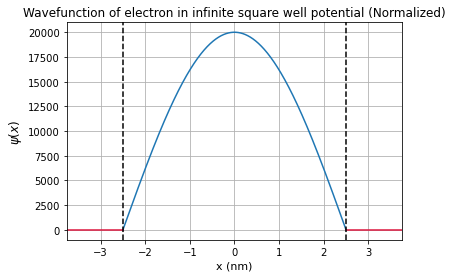

In [10]:
#plots the wavefunction of electron in infinite square well potential
plt.figure()
plt.title('Wavefunction of electron in infinite square well potential (Normalized)')
plt.plot(x_well*1e9, normalized_solution(0,0.03*e,initial_r, x_range, step, e/1e7, tisefunction)[0])
plt.plot(x_minus,len(x_minus)*[0], color='crimson')
plt.plot(x_plus,len(x_plus)*[0], color='crimson')
plt.axvline(-a*1e9,0,1e5,ls='--',color='black')
plt.axvline(a*1e9,0,1e5,ls='--',color='black')
plt.xlabel('x (nm)', fontsize = 11)
plt.ylabel(f'$\psi(x)$', fontsize = 12)
plt.xlim(-1.5*a*1e9,1.5*a*1e9)
plt.grid(True)

Note by changing the initial value of $ \phi $, there is no change to the wavefunction array which the function normalized_solution produces. This suggests the normalization works as expected. This is compared to the analytical solutions of the infinite potential well

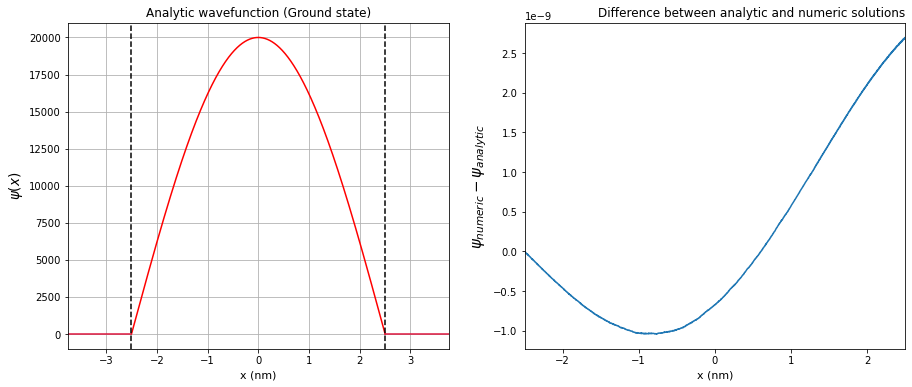

In [11]:
#creates numeric and analytic wavefunction solutions
analytical_psi = (1 / np.sqrt(a)) * np.cos((np.pi * x_well) / (2*a))
norm_sol = normalized_solution(0,0.03*e,initial_r, x_range, step, e/1e7, tisefunction)[0]

#initialize figure
fig1, axs1 = plt.subplots(1, 2, figsize=(15, 6))

#plots analytic wavefunction 
plt.subplot(1,2,1)
plt.title('Analytic wavefunction (Ground state)')
plt.plot(x_well*1e9, analytical_psi, color='red')
plt.plot(x_minus,len(x_minus)*[0], color='crimson')
plt.plot(x_plus,len(x_plus)*[0], color='crimson')
plt.axvline(-a*1e9,0,1e5,ls='--',color='black')
plt.axvline(a*1e9,0,1e5,ls='--',color='black')
plt.xlabel('x (nm)', fontsize = 11)
plt.ylabel(f'$\psi(x)$', fontsize = 13.5)
plt.xlim(-1.5*a*1e9,1.5*a*1e9)
plt.grid(True)
print()

#plots difference between numeric and analytical wavefunction values
plt.subplot(1,2,2)
plt.title("Difference between analytic and numeric solutions",loc='right')
plt.plot(x_well*1e9, norm_sol - analytical_psi)
plt.ylabel('$ \psi_{numeric} - \psi_{analytic} $',fontsize = 15)
plt.xlabel('x (nm)', fontsize = 11)
plt.xlim(-a*1e9,a*1e9);

### Comparison of analytical and numerical solutions in the Ground state
At first glance, the analytical and numerical solution of the wavefunction for ground state energy look essentially the same. If the difference of the 2 values are taken, we end up with the second graph which should suggests there is deviation although the deviation between the 2 is very small (order of $ 10^{-9} $) compared to the values of the wavefunction.

The shape of the deviation however is unexpected, is non-uniform and varies between being positive and negative. An attempted explanation may be suggested. The 2 forms of error which are introduced by computation are 

 1. Error introduced by the finite-step size, iteration of the Runge-Kutta method over a limited number of discrete datapoints (values are not continuous)
 2. Error introduced by the calculation of the normalization integral, which again is due to discretization of a continuous function. This error however, affects all values equally, since we multiply the normalization to the original solutions.
 
It is therefore likely that the shape of the error is due to the Runge-Kutta function generating values of $ \psi(x) $. To explain the asymmetry of the error, it can be noted that we have imposed a hard restriction of the value of $ \psi(-a) $ which restricts the numerical values which can be computed. On the otherhand at $ \psi(a) $, we have no hard restriction on its value. This allows numerically a much wider range of possible values which can be at $ \psi(a) $ which may lead to more variation in its value. 

This means that even though we indirectly impose a condition from trying to find $ \psi(a) = 0 $ by varying energy, we still introduce compounding error from this process. In this case on the right side of the well, numerical values are larger than the analytical solutions. The smaller difference around the middle may be caused by the undershoot of the Runge-Kutta method for values close to $ \psi(-a) $ and overshoot of converging to $ \psi(a) = 0 $ cancelling out. 

If the step size of the x values decrease and number of points of x increases, the error of the numerical solution against the analytical solution will be reduced. 

## 3.3
## Finding Excited Higher Energy States
We may now calculate numerical solutions for the excited states of the infinite square well with no potential. For the infinite square well, since there exists an analytical solution, we may use an ansatz for our initial energies which is based on the computed analytic values for eigenenergies. However, I will adopt a more general approach which will allow us to more easily generalize guesses of initial energies used in the secant method for any arbitrary potentials inside the square well where there may be no analytical solution. This is shown as follows:

1. We first note that for normalizable wavefunction solutions - which infinite well type systems must have, the eigenenergies of the system must be larger than the minimum value of the potential (Griffiths, 2004, p.30). Although this is not very specific, it may act as a sanity check for eigenenergies of a system, especially if energies are unknown and no analytic solution exists. 

2. More importantly, values of $ \psi(a) $ vary with values of energy, E. Aformentioned, there is some function which exists between calculated $ \psi(a) $ values and E. We find allowed eigenenergy solutions when this function is equal to 0. Hence, if this function is roughly plotted by varying energy by a certain number of discrete values to find different values of $ \psi(a) $, we may be able to roughly reproduce the function between $ \psi(a) $ and E which gives a rough observation to where the roots of the function are (Ertl, 2016, p.13). From there, accurate enough estimations of E1 and E2 may be found to converge to the correct ground state or excited state energies. 

In [12]:
def Efunction(Erange, r_value, x_values, xstep, function):
    
    """This function plots values of psi(a) as a function E for a given potential energy in a square well
       Inputs: Range of Energy values (array), Initial psi and phi values, Range of x-values, step value, Potential Function
       Outputs: psi(a) values for each value of E (array)"""
    
    #initialize array of psi a 
    psi_a = []
    
    #loop to find different psi a values 
    for i in Erange:
        psi_a.append(RungeKutta(r_value,x_values, xstep, i, function)[len(x_values)])
        
    return np.array(psi_a, float)

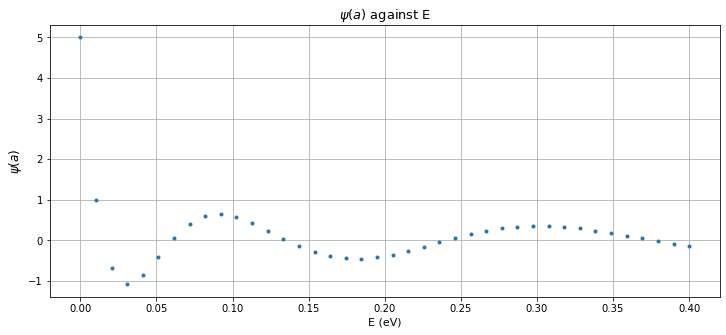

In [13]:
#range of E values 
E_infinitewell = np.linspace(0, 0.4*e, 40)

#plots psi(a) values against E values 
psi_a_values = Efunction(E_infinitewell, initial_r, x_range, step, tisefunction);
plt.figure(figsize=(12,5))
plt.title('$ \psi(a) $ against E', fontsize=13)
plt.xlabel('E (eV)', fontsize=11)
plt.ylabel('$ \psi(a) $', fontsize=12)
plt.plot(E_infinitewell/e, psi_a_values,'.' )
plt.grid(True)

We are able to roughly see roots of energy and thus can determine initial guesses for the first 3 eigenstates of the infinite square well. For n = 2, this is about 0.05 to 0.07 eV. For n = 3, this is about 0.12 to 0.15 eV and for n = 4 it is roughly 0.23 to 0.26 eV

n = 2
Analytical : E = 0.060164825941647355 eV
Numerical  : E = 0.060164825941805944 eV

n = 3
Analytical : E = 0.13537085836870655 eV
Numerical  : E = 0.135370858369821 eV

n = 4
Analytical : E = 0.24065930376658942 eV
Numerical  : E = 0.24065930377284128 eV



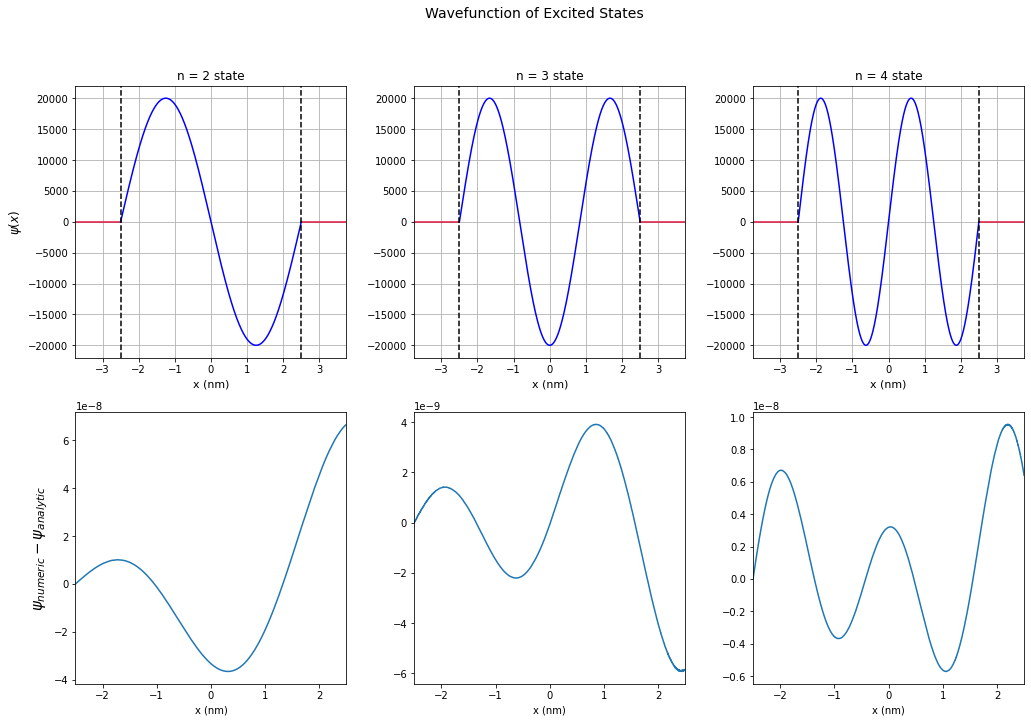

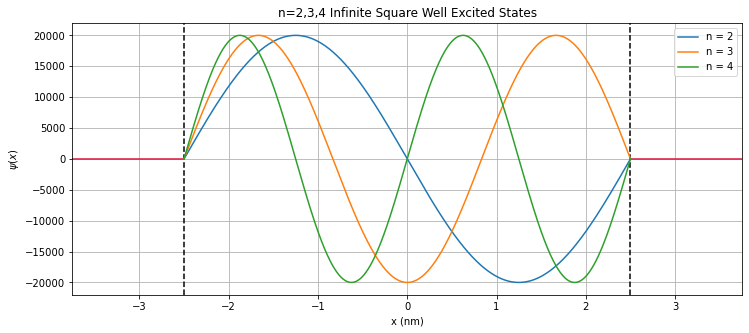

In [14]:
#calculates wavefunctions, energies for excited states, ground state
n1 = normalized_solution(0,0.03*e,initial_r, x_range, step, e/1e7, tisefunction)
n2 = normalized_solution(0.05*e,0.07*e,initial_r, x_range, step, e/1e7, tisefunction)
n3 = normalized_solution(0.12*e,0.15*e,initial_r, x_range, step, e/1e7, tisefunction)
n4 = normalized_solution(0.23*e,0.26*e,initial_r, x_range, step, e/1e7, tisefunction)
j = 2

#loop to plot each excited state n=2,3,4
fig, axs = plt.subplots(2, 3, figsize=(17, 11))
plt.suptitle('Wavefunction of Excited States', fontsize=14)

for i in [n2,n3,n4]:
    #prints energies of excited states (numerical and analytical)
    print(f'n = {j}')
    print(f'Analytical : E = {(np.pi*hbar)**2 / (2*m*d**2) * j**2 / e} eV')
    print(f'Numerical  : E = {i[1]/e} eV')
    print()
    
    #plots wavefunction of different excited states
    plt.subplot(2,3,j-1)
    plt.title(f'n = {j} state')
    plt.xlabel('x (nm)', fontsize = 11) 
    plt.ylabel(f'$\psi(x)$', fontsize = 12) if j==2 else None
    plt.xlim(-1.5*a*1e9,1.5*a*1e9)
    plt.grid(True)
    plt.plot(x_minus,len(x_minus)*[0], color='crimson')
    plt.plot(x_plus,len(x_plus)*[0], color='crimson')
    plt.plot(x_well*1e9, i[0], color='blue')
    plt.axvline(-a*1e9,0,1e5,ls='--',color='black')
    plt.axvline(a*1e9,0,1e5,ls='--',color='black')
    
    #plots the difference between numeric and analytic wavefunctions
    plt.subplot(2,3,j+2)
    plt.xlim(-a*1e9,a*1e9)
    plt.xlabel('x (nm)')
    plt.ylabel('$ \psi_{numeric} - \psi_{analytic} $',fontsize = 15) if j==2 else None
    plt.plot(x_well*1e9,i[0]-((1/np.sqrt(a))*np.sin((j*np.pi*x_well) / (2*a)))) if j == 4 else plt.plot(x_well*1e9,
    i[0]+((1/np.sqrt(a))*np.cos((j*np.pi*x_well) / (2*a)))) if j == 3 else plt.plot(x_well*1e9,
    i[0]+((1/np.sqrt(a))*np.sin((j*np.pi*x_well) / (2*a)))) if j == 2 else None
    j = j+1

#adjust subplot spacing
plt.subplots_adjust(wspace=0.25)

#plots the excited states all together on one graph
plt.figure(figsize=(12,5))
plt.title('n=2,3,4 Infinite Square Well Excited States')
plt.xlabel('x (nm)')
plt.ylabel('$ \psi(x) $ ')
plt.xlim(-a*1.5*1e9, a*1.5*1e9)
plt.axvline(-a*1e9,0,1e5,ls='--',color='black')
plt.axvline(a*1e9,0,1e5,ls='--',color='black')
plt.plot(x_minus,len(x_minus)*[0], color='crimson')
plt.plot(x_plus,len(x_plus)*[0], color='crimson')

j=2
#loop to plot each excited state
for i in [n2,n3,n4]:
    plt.plot(x_well*1e9, i[0], label=f'n = {j}')
    j = j+1
plt.legend(loc='best')
plt.grid(True)

The 1st, 2nd and 3rd excited states (n=2,3,4) have been plotted for the infinite square well. The guesses for the eigenenergies were found from the plot of $ \psi(a) $ against E. From the second row of graphs which plot the difference between the numeric and analytic wavefunctions, the difference between the wavefunctions is very small (order of 10^8 - 10^9) which suggests the calculated wavefunction values are correct. 

One complication which had to be dealt with was the fact that multiplying any wavefunction by (-1) gives an equally valid wavefunction solution. Depending on which $\phi(-a) $ value was chosen, you can either get a wavefunction or its negative version. This made the process of finding the difference between numeric and analytic wavefunction more tedious since some of the computed wavefunctions were the negative version of Eq.10. This was dealt with by using embedded if statements to change whether the analytic function is added or subtracted.

#### Eigenstates of Large n
The same process may be done to find higher eigenstates although more tedious. 

Wall time: 6.27 s


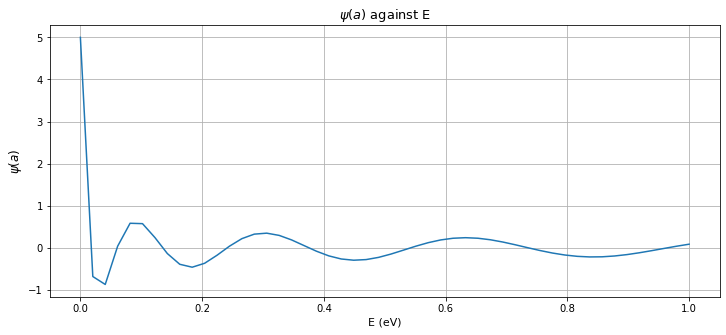

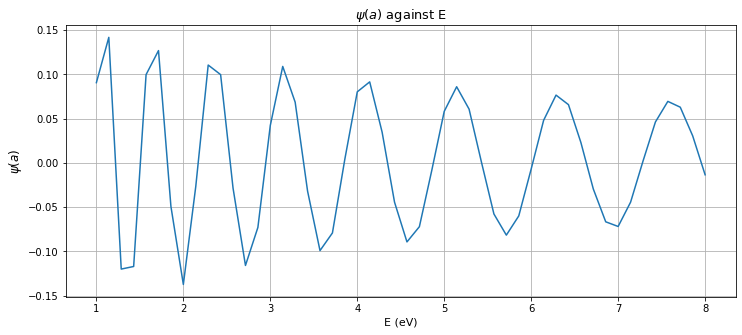

In [15]:
%%time
#range of E values between 0 to 8 eV
E_infinitewell_1 = np.linspace(0, 1*e, 50)
E_infinitewell_2 = np.linspace(1*e,8*e,50)

#plots psi(a) against E between 0 and 8 eV in 2 graphs
for i in [E_infinitewell_1, E_infinitewell_2]:
    psi_a_values = Efunction(i, initial_r, x_range, step, tisefunction)
    plt.figure(figsize=(12,5))
    plt.title('$ \psi(a) $ against E', fontsize=13)
    plt.xlabel('E (eV)', fontsize=11)
    plt.ylabel('$ \psi(a) $', fontsize=12)
    plt.plot(i/e, psi_a_values)
    plt.grid(True)

To make each root more visible, 2 graphs were plotted, one which calculates values between 0 to 1 eV and one between 1 and 8 eV. Since one graph ends where one starts, counting can be done from one graph to the other without having issues with double counting or no counting. To make the roots even more clear, the plot style was made to join points together to make a continuum. This led to predicted energies of the n = 18 state around 4.6 to 5 eV and for n = 19 around 5.3 to 5.6 eV. 

One possible limitation is longer computational time. The code block above takes a few seconds to run. If the number of E values is increased both in density and length, the computational run time may be too long and the method becomes unfeasible for states such as n = 100. 

The numerical solutions for the very excited states n=18 and n=19 are plotted and compared to their analytic counter parts down below.

n = 18
Analytical : E = 4.873350901273436 eV
Numerical  : E = 4.8733509531680115 eV

n = 19
Analytical : E = 5.429875541233675 eV
Numerical  : E = 5.429875613012176 eV



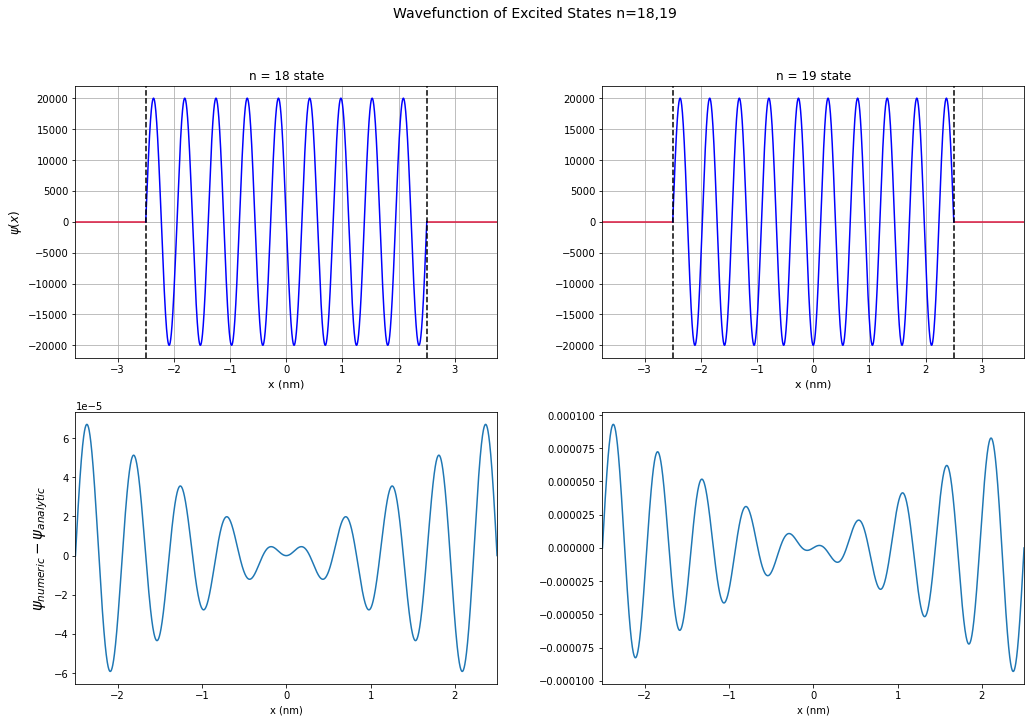

In [16]:
#calculate wavefunction and energies for n=18,19
n18 = normalized_solution(4.6*e,5*e,initial_r, x_range, step, e/1e7, tisefunction)
n19 = normalized_solution(5.3*e,5.6*e,initial_r, x_range, step, e/1e7, tisefunction)

j = 18
#loop to plot each excited state n=2,3,4
fig, axs = plt.subplots(2, 2, figsize=(17, 11))
plt.suptitle('Wavefunction of Excited States n=18,19', fontsize=14)

for i in [n18,n19]:
    
    #prints energies of excited states (numerical and analytical)
    print(f'n = {j}')
    print(f'Analytical : E = {(np.pi*hbar)**2 / (2*m*d**2) * j**2 / e} eV')
    print(f'Numerical  : E = {i[1]/e} eV')
    print()
    
    #plots wavefunction of different excited states
    plt.subplot(2,2,j-17)
    plt.title(f'n = {j} state')
    plt.xlabel('x (nm)', fontsize = 11) 
    plt.ylabel(f'$\psi(x)$', fontsize = 12) if j==18 else None
    plt.xlim(-1.5*a*1e9,1.5*a*1e9)
    plt.grid(True)
    plt.plot(x_minus,len(x_minus)*[0], color='crimson')
    plt.plot(x_plus,len(x_plus)*[0], color='crimson')
    plt.plot(x_well*1e9, i[0], color='blue')
    plt.axvline(-a*1e9,0,1e5,ls='--',color='black')
    plt.axvline(a*1e9,0,1e5,ls='--',color='black')
    
    #plots the difference between numeric and analytic wavefunctions
    plt.subplot(2,2,j-15)
    plt.xlim(-a*1e9,a*1e9)
    plt.xlabel('x (nm)')
    plt.ylabel('$ \psi_{numeric} - \psi_{analytic} $',fontsize = 15) if j==18 else None
    plt.plot(x_well*1e9,i[0]+((1/np.sqrt(a))*np.sin((j*np.pi*x_well) / (2*a)))) if j == 18 else plt.plot(x_well*1e9,
    i[0]+((1/np.sqrt(a))*np.cos((j*np.pi*x_well) / (2*a)))) if j == 19 else None
    j = j+1

#adjust subplot spacing
plt.subplots_adjust(wspace=0.25)

Eigenenergies of the very excited states match and the difference between the numeric and analytical wavefunction values are very small which suggests that the calculated wavefunctions are correct. A notable comment to make is the fact that the energies calculated numerically have become less precise relative to the analytical values (8 significant figures), where for n=1,2,3 this is 11 significant figures. The most likely explanation is the fact that for these higher energy states, the greater frequency of oscillation is more difficult to compute precisely using Runge-Kutta methods since the derivative of $\psi$ varies with greater volatility.

## 3.4 Infinite Square Well (3-dimensional) (Quantum Dots)
The infinite square well may be easily extended to a 3 dimensional well, ie. a particle confined in a box. This is also a basic description for a Quantum Dot - a semiconductor crystal with an electron confined inside. We note that the TISE for the 3D infinite square well can be solved through separation of variables, reduced to 3 1-dimensional infinite square wells. This also means that the total energy can be expressed as a sum of energies in all three dimensions. We may thus continue to use the functions defined above and simply add together to obtain the total solution. 

For the analytic solution of the 3-dimensional infinite square well, this is expressed by 

11.
$$ E_{(n_x,n_y,n_z)} = (n_{x}^2+n_{y}^2+n_{z}^2)\frac{\pi^2\hbar^2}{8ma^2} = \frac{n^2\pi^2\hbar^2}{8ma^2} $$

where $n_x$, $n_y$ and $n_z$ are integers indexing from 1 to infinity. We first calculate the energies of the first 10 states  of the 3-dimensional infinite square-well. The solutions assume the dimensions of the square-well is still the same (well length is d in the x,y and z directions).  

Energy level 1: E = 0.045124 eV, n^2 = 3
Energy level 2: E = 0.090247 eV, n^2 = 6
Energy level 3: E = 0.13537 eV, n^2 = 9
Energy level 4: E = 0.16545 eV, n^2 = 11
Energy level 5: E = 0.18049 eV, n^2 = 12
Energy level 6: E = 0.21058 eV, n^2 = 14
Energy level 7: E = 0.2557 eV, n^2 = 17
Energy level 8: E = 0.27074 eV, n^2 = 18
Energy level 9: E = 0.28578 eV, n^2 = 19
Energy level 10: E = 0.31587 eV, n^2 = 21


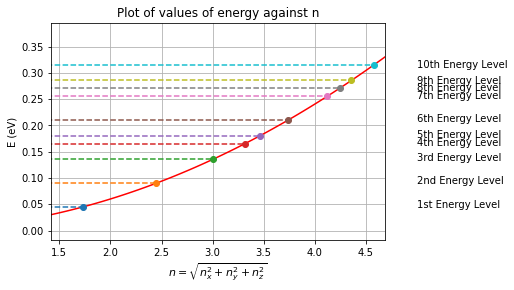

In [17]:
#constructing total energies of 3D square well from 1 dimensional eigenenergies
E111, E112, E122, E113, E222 = 3*n1[1], 2*n1[1]+n2[1], n1[1]+2*n2[1], 2*n1[1]+n3[1], 3*n2[1]
E123, E223, E114, E331, E124 = n1[1]+n2[1]+n3[1], 2*n2[1]+n3[1], 2*n1[1]+n4[1], 2*n3[1]+n1[1], n1[1]+n2[1]+n4[1]

#first 10 energy levels, values of n^2
energies = np.array([E111, E112, E122, E113, E222, E123, E223, E114, E331, E124])
nsq_value = np.array([3,6,9,11,12,14,17,18,19,21])

#plots energy against n 
plt.figure()
plt.title('Plot of values of energy against n')
plt.xlabel('$ n = \sqrt{n_x^2 + n_y^2 + n_z^2} $', fontsize=11)
plt.ylabel('E (eV)')
plt.xlim(np.sqrt(2),np.sqrt(22))
plt.grid(True)

#quadratic fit to energies, n 
p = np.polyfit(np.sqrt(nsq_value),energies/e,2)
plt.plot(np.linspace(0,5,100), np.poly1d(p)(np.linspace(0,5,100)), color='red')

#loop to plot energies
for i in np.arange(1,11,1):
    plt.plot(np.sqrt(nsq_value[i-1]), energies[i-1]/e,'o')
    plt.text(5, energies[i-1]/e*0.98, f'{i}st Energy Level') if i==1 else plt.text(5, energies[i-1]/e*0.98, 
    f'{i}nd Energy Level') if i==2 else plt.text(5, energies[i-1]/e*0.98, f'{i}rd Energy Level') if i==3 else plt.text(5, 
    energies[i-1]/e*0.98, f'{i}th Energy Level') 

#plots lines corresponding to energies
for i in np.arange(1,11,1):
    xran = np.linspace(0, np.sqrt(nsq_value[i-1]),100)
    Eline = energies[i-1]/e
    plt.plot(xran,[Eline]*len(xran),'--')
    
    print(f'Energy level {i}: E = {energies[i-1]/e:0.5} eV, n^2 = {nsq_value[i-1]}')

By using numeric 1-dimensional solutions to create the 10 smallest energy levels of the 3-dimensional system and plotting against the value of n which would be compared analytically to it, one obtains a relation between energy and n which is seemingly quadratic. This verified by the analytic computation of energy against n which suggests quadratic variation seen in Eq.11.

One distinguishment from the 1-dimensional well however is that fact that the distribution of allowed energy levels across n is not uniform. This is a reflection of the fact different combinations of $n_x$, $n_y$ and $n_z$ can produce smaller, more inbetween values which are not permitted by the 1-dimensional case. There is also a case of energy degeneracy. For instance $ E_{121} $ has the same energy level as $ E_{112} $ even though they will have different wavefunction solutions. This is also a feature which is unseen in the one-dimensional case. 

We now look at the transition of $ E_{112} $ to $ E_{111}$, and consider the 3-dimensional infinite square well as a system for a quantum dot. 

(The code below may take several seconds to run)

The photon wavelength associated with the E112 - E111 transition for a = 2.5nm is 2.75e-05 m


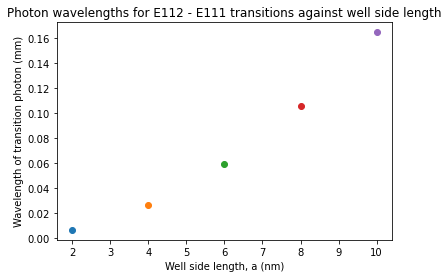

In [18]:
#calculates photon energy, wavelength from transition
deltaE = E112 - E111 
wavelength = 2*np.pi*hbar*299792458 / deltaE

#prints transition wavelength
print(f'The photon wavelength associated with the E112 - E111 transition for a = 2.5nm is {wavelength:0.03} m')
plt.figure()
plt.title('Photon wavelengths for E112 - E111 transitions against well side length')

#calculates transition wavelengths for different values of a, plots values against a
for i in np.linspace(2/1e9, 1/1e8, 5):
    a = i
    #define range of x values
    x_i1 = -a
    x_f1 = a
    step1 = (x_f1 - x_i1) / 2000
    x_range1 = np.arange(x_i1, x_f1, step1)
    
    #calculated energy values 
    n1_sol = normalized_solution(0,(np.pi*hbar)**2 / (4*m*a**2),initial_r, x_range1, step1, e/1e7, tisefunction)[1]
    n2_sol = normalized_solution((np.pi*hbar)**2 / (4*m*a**2), (np.pi*hbar)**2 / (m*a**2) ,initial_r, 
             x_range1, step1, e/1e7, tisefunction)[1]
    E112 = 2*n1_sol+n2_sol
    E111 = 3*n1_sol
    wavelength = 2*np.pi*hbar*299792458 / (E112-E111)
    
    plt.plot(a*1e9,wavelength*1e3,'o')
    
plt.ylabel('Wavelength of transition photon (mm)')
plt.xlabel('Well side length, a (nm)');

#### Quantum Dots
Modeling a quantum dot as a infinite square well system, we are able to see that a quantum dot can only take up discrete energy levels, hence emit only very specific colours. 

From the graphed values found numerically, if we change the physical property of the quantum dots (changing the well length), the wavelength transition of $ E_{112} $ to $ E_{111}$ varies quadratically with the length of the well (a is used here). This means that the transition between these two energy levels may be tuned to emit any specific wavelength by changing the size of the square well. 

Although this result is produced from the numerical calculations for energies, this can also be confirmed by looking at the analytical solutions and Eq.11. Energy is inversely proportional to $a^2$ and also inversely proportional to the wavelength, $\lambda$. This gives the relation that $\lambda $ is proportional to $a^2$

## 4. Infinite 'Unsquare' Wells
The infinite square well is the most basic example of a quantum system - we may now extend to look at different potentials which are inside the infinite well. We will be looking at 2 different well potentials, a harmonic potential and then consider the case of the finite square potential, where the potential energy has some fixed constant value inside the well.  

The harmonic potential has a form defined by 

12.
$$ V(x) = V_0 \frac{x^2}{a^2} $$

where $V_0$ is a constant and x is between -a to a. The finite square potential is defined by 

13.
$$ V(x) = \begin{cases} 0 & \text{if } -a/2 \leq x \leq +a/2, \\ 
    V_0  & \text{if } |x| > a/2, \end{cases} 
$$

### 4.1 Embedded Harmonic Potential 
We first numerically solve the system with the harmonic potential. In this instance, we will set the constant $V_0$ to e (e is the electron charge value). 
A new potential energy function must be defined first. 

In [19]:
#new parameters, rewrite 'a' value
V_0 = e
a = d/2

#harmonic potential energy
def harmonic(x):
    
    """This function defines the harmonic potential inside the square well.
       Inputs: x-values 
       Output: Potential energy at given x-value"""
    
    V_x = (V_0 * x**2) / a**2
    
    return V_x

In [20]:
#RHS of PDE for harmonic potential
def harmonictise(x,r,E):
    
    """This function calculates the RHS of the differential equation of the TISE for an harmonic potential embedded in 
       a infinite potential well
       Inputs: r: (2 valued array of psi and phi, the wavefunction and wavefunction derivative respectively)
               x: displacement (m)
               E: energy eigenvalues of the quantum system """
    
    #defines wavefunction psi, derivative of psi
    psi = r[0]
    phi = r[1]
    
    #defines RHS of 2 differential equations
    f_1 = phi
    f_2 = (2*m/hbar**2)*(harmonic(x)-E)*psi
    
    return np.array([f_1,f_2],float)

Before energy eigenvalues are explicitly calculated, we first look at the graph of $ \psi(a) $ against E to look for good initial estimates of energy. 

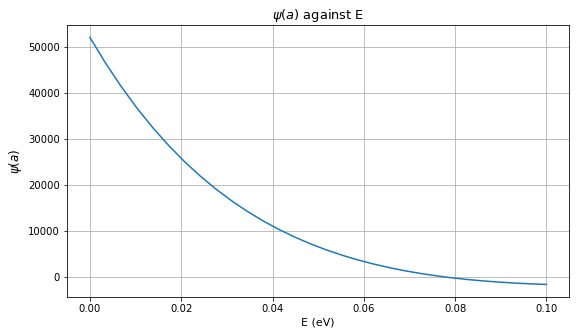

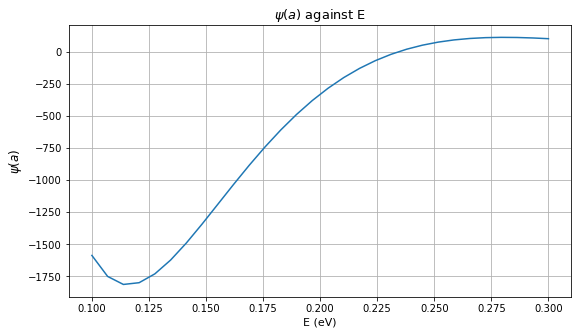

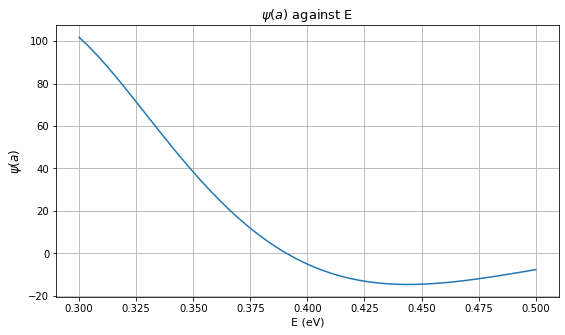

In [21]:
#range of tested E values (0 to 0.1 eV)
Energy_values = np.linspace(0,0.1*e,30)

#plots psi(a) values against E values 
psi_a_values = Efunction(Energy_values, initial_r, x_range, step, harmonictise);
plt.figure(figsize=(9,5))
plt.title('$ \psi(a) $ against E', fontsize=13)
plt.xlabel('E (eV)', fontsize=11)
plt.ylabel('$ \psi(a) $', fontsize=12)
plt.plot(Energy_values/e, psi_a_values, )
plt.grid(True)

#E values between 0.1 to 0.3 eV
Energy_values1 = np.linspace(0.1*e, 0.3*e, 30)

#plots psi(a) values against E values 
psi_a_values = Efunction(Energy_values1, initial_r, x_range, step, harmonictise);
plt.figure(figsize=(9,5))
plt.title('$ \psi(a) $ against E', fontsize=13)
plt.xlabel('E (eV)', fontsize=11)
plt.ylabel('$ \psi(a) $', fontsize=12)
plt.plot(Energy_values1/e, psi_a_values)
plt.grid(True)

#E values between 0.3 and 0.5 eV
Energy_values2 = np.linspace(0.3*e,0.5*e)

#plots psi(a) values against E values 
psi_a_values = Efunction(Energy_values2, initial_r, x_range, step, harmonictise);
plt.figure(figsize=(9,5))
plt.title('$ \psi(a) $ against E', fontsize=13)
plt.xlabel('E (eV)', fontsize=11)
plt.ylabel('$ \psi(a) $', fontsize=12)
plt.plot(Energy_values2/e, psi_a_values)
plt.grid(True)

The graph allows the estimation of the first few states of energies of this particular system. This shows the strength of the approach taken to estimate energy values for arbitrary potentials when analytic energies are unknown. Once again, the datapoints are joined together to make determine the position of the roots clearer. Another point is that the graph was segemented into 3 parts. This is due to the fact that the value of $\psi(a)$ declined substantially as can be seen by the order of magnitudes of each graph which made it harder to see the roots for higher energies

By looking at the rough ranges of the first roots, we now calculate the wavefunctions and energy for the first 3 eigenstates. For guesses the 1st state is around 0.04 to 0.05 eV, the 2nd state uses 0.2 to 0.25 eV and the 3rd state uses 0.35 to 0.4 eV. 

State 1, n = 1
E = 0.07808 eV

Analytic Pure Harmonic Oscillator, n = 1
E = 0.07808 eV

State 2, n = 2
E = 0.2343 eV

Analytic Pure Harmonic Oscillator, n = 2
E = 0.2342 eV

State 3, n = 3
E = 0.3908 eV

Analytic Pure Harmonic Oscillator, n = 3
E = 0.3904 eV



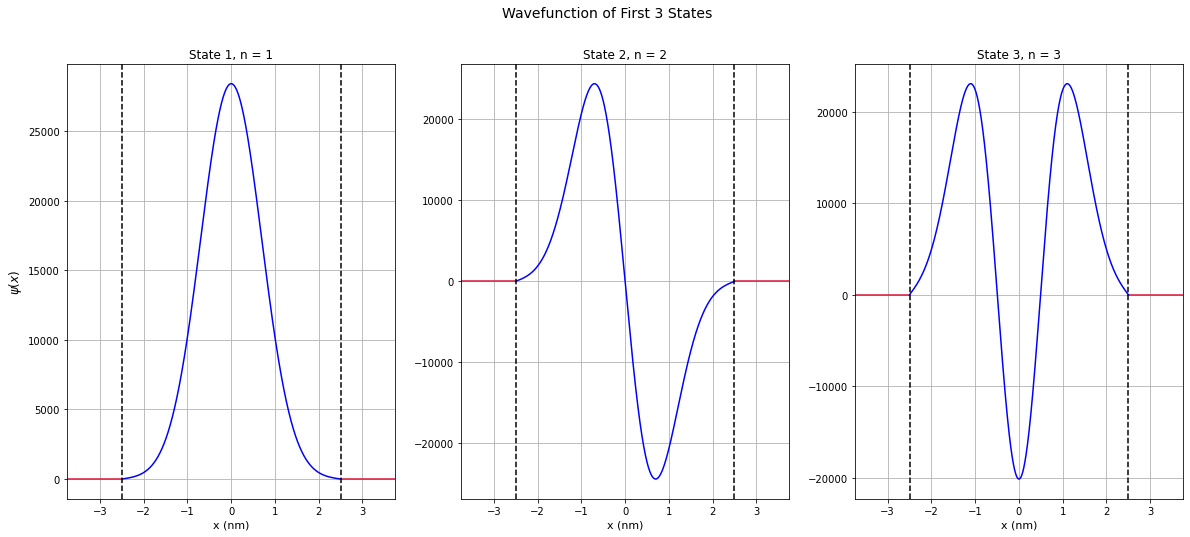

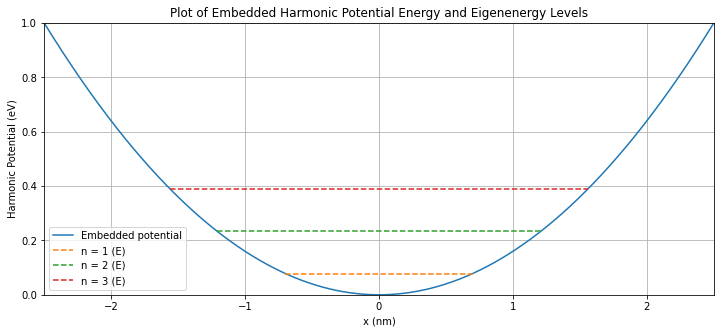

In [22]:
#first 3 energy states of the harmonic potential
n1 = normalized_solution(0.04*e,0.05*e,initial_r, x_range, step, e/1e7, harmonictise)
n2 = normalized_solution(0.2*e,0.25*e,initial_r, x_range, step, e/1e7, harmonictise)
n3 = normalized_solution(0.35*e,0.4*e,initial_r, x_range, step, e/1e7, harmonictise)
j = 1

#initialize figure
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
plt.suptitle('Wavefunction of First 3 States', fontsize=14)

#loop to plot each excited state n=1,2,3
for i in [n1,n2,n3]:
    #prints energies of states, theoretical quantum harmonic oscillator (numerical)
    print(f'State {j}, n = {j}')
    print(f'E = {i[1]/e:0.04} eV')
    print()
    print(f'Analytic Pure Harmonic Oscillator, n = {j}')
    print(f'E = {(j-0.5)*hbar*np.sqrt((2*V_0)/(m*a**2))/e:0.04} eV')
    print()
    
    #plots wavefunction of different states
    plt.subplot(1,3,j)
    plt.title(f'State {j}, n = {j}')
    plt.xlabel('x (nm)', fontsize = 11) 
    plt.ylabel(f'$\psi(x)$', fontsize = 12) if j==1 else None
    plt.xlim(-1.5*a*1e9,1.5*a*1e9)
    plt.grid(True)
    plt.plot(x_minus,len(x_minus)*[0], color='crimson')
    plt.plot(x_plus,len(x_plus)*[0], color='crimson')
    plt.plot(x_well*1e9, i[0], color='blue')
    plt.axvline(-a*1e9,0,1e5,ls='--',color='black')
    plt.axvline(a*1e9,0,1e5,ls='--',color='black')
    
    j=j+1

#plots harmonic potential and eigenenergies
plt.figure(figsize=(12,5))
plt.title('Plot of Embedded Harmonic Potential Energy and Eigenenergy Levels')
plt.plot(x_range*1e9, harmonic(x_range)/e, label='Embedded potential')
plt.xlim(-a*1e9,a*1e9)
plt.ylim(0,1)
plt.xlabel('x (nm)')
plt.ylabel('Harmonic Potential (eV)')
j=1
#loop to plot eigenenergy lines 
for i in [n1,n2,n3]:
    xlines = np.linspace(-1e9*np.sqrt(i[1]/V_0)*a,1e9*np.sqrt(i[1]/V_0)*a,100)
    plt.plot(xlines, np.array([i[1]]*len(xlines))/e,'--', label=f'n = {j} (E)')
    j=j+1
plt.legend(loc='best')
plt.grid(True)

### Analysis on Embedded Harmonic Potential 
The wavefunctions of the first 3 states of the embedded harmonic potential is plotted. These appear to be valid solutions considering both boundary conditions are met and the solutions show symmetry about the center x=0. 

Comparison to Pure Analytical Harmonic Oscillator:

Assuming we use the same potential for both systems (Eq.12), the wavefunction solutions to the embedded harmonic potential look extremely similar to the quantum harmonic oscillator. Solutions to both systems appear to have the exact same form, the only difference being that the infinite potential constrains the numeric solutions such that they decay to 0 at the boundaries instead of decaying to 0 at infinite x. This is emphasized by the graph of the energies plotted with the embedded harmonic potential which gives a result which looks extremely similar to the quantum harmonic oscillator. 

The energy of the pure harmonic potential is calculated by 

14.
$$ E = (n+\frac{1}{2})\hbar\omega $$ 
15.
$$ \omega = \sqrt{\frac{2V_0}{ma^2}} $$

In reality, by looking and comparing energies numerically calculated for the embedded harmonic potential and analytical calculations for the quantum harmonic oscillator (assuming following the same potential), the printed energies calculated are idential for each corresponding nth state. This suggests that the additional act of constraining the system with a infinite well does not affect the energies which a particle may take, only affecting its possible positions. This has some classical intuition, since we may imagine the particle moving around with the same energy and elastically colliding with the walls of the infinite well which do not reduce its energy. 

The small differences in energy between the  compared numerical energies and analytical pure harmonic energies is nost certainly due to lack of precision of the computation of the solutions. This would be removed if the tolerance was increased or the step size of the x-array is reduced.

### 4.2 Embedded Finite Square Potential

In [23]:
#defines finite square potential embedded in infinite well
def squarewell(x):
    
    if abs(x) < a/2:
        V = 0 
    
    if abs(x) >= a/2:
        V = V_0
   
    return V

In [24]:
#RHS of the PDE for a finite square potential embedded inside an infinite well 
def finitetise(x,r,E):
    
    """This function calculates the RHS of the differential equation of the TISE for an infinite square well potential
       Inputs: r: (2 valued array of psi and phi, the wavefunction and wavefunction derivative respectively)
               x: displacement (m)
               E: energy values of the quantum system"""
    
    #defines wavefunction psi, derivative of psi
    psi = r[0]
    phi = r[1]
    
    #defines RHS of 2 differential equations
    f_1 = phi
    f_2 = (2*m/hbar**2)*(squarewell(x)-E)*psi

    return np.array([f_1,f_2],float)

We once again test for roots by iterating $\psi(a)$ over different values of energy

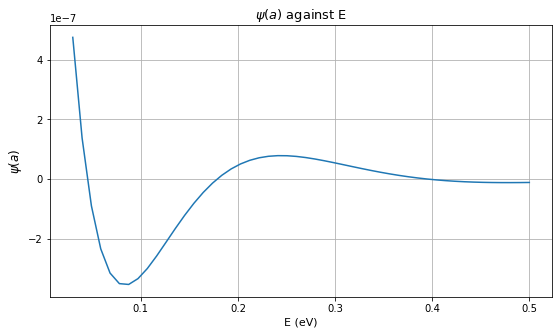

In [25]:
#range of tested E values
initial_r = np.array([0,0.01],float)
Energy_values = np.linspace(0.03*e,0.5*e,50)

#plots psi(a) values against E values 
psi_a_values = Efunction(Energy_values, initial_r, x_range, step, finitetise);
plt.figure(figsize=(9,5))
plt.title('$ \psi(a) $ against E', fontsize=13)
plt.xlabel('E (eV)', fontsize=11)
plt.ylabel('$ \psi(a) $', fontsize=12)
plt.plot(Energy_values/e, psi_a_values)
plt.grid(True)

The graph establishes roughly where the first 3 eigenenergies are. We use for guesses, for the 1st state E = 0.03 and 0.08 eV, the 2nd state 0.1 to 0.13 eV and 3rd state 0.35 to 0.41 eV. 

State 1, n = 1
E = 0.0449 eV

State 2, n = 2
E = 0.178 eV

State 3, n = 3
E = 0.396 eV



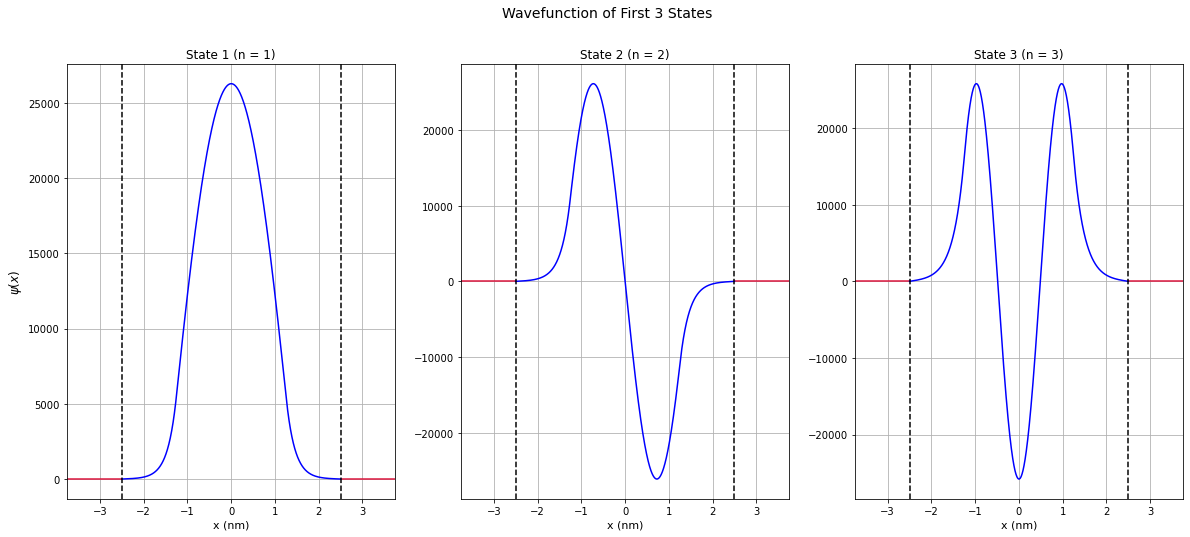

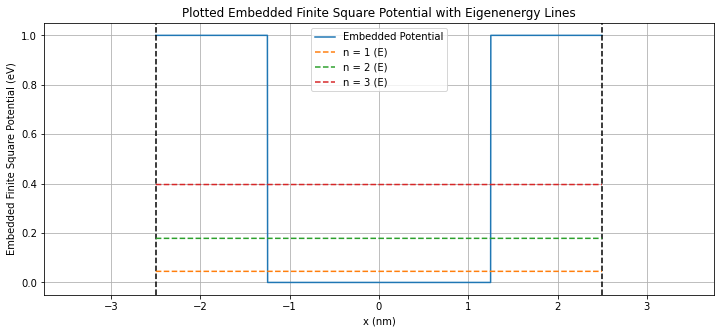

In [26]:
#plots first 3 energy states
n1 = normalized_solution(0.03*e,0.08*e,initial_r, x_range, step, e/1e7, finitetise)
n2 = normalized_solution(0.1*e,0.13*e,initial_r, x_range, step, e/1e7, finitetise)
n3 = normalized_solution(0.35*e,0.41*e,initial_r, x_range, step, e/1e7, finitetise)
j = 1

#loop to plot each excited state n=1,2,3
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
plt.suptitle('Wavefunction of First 3 States', fontsize=14)

for i in [n1,n2,n3]:
    #prints energies of excited states (numerical and analytical)
    print(f'State {j}, n = {j}')
    print(f'E = {i[1]/e:0.03} eV')
    print()
    
    #plots wavefunction of different excited states
    plt.subplot(1,3,j)
    plt.title(f'State {j} (n = {j})')
    plt.xlabel('x (nm)', fontsize = 11) 
    plt.ylabel(f'$\psi(x)$', fontsize = 12) if j==1 else None
    plt.xlim(-1.5*a*1e9,1.5*a*1e9)
    plt.grid(True)
    plt.plot(x_minus,len(x_minus)*[0], color='crimson')
    plt.plot(x_plus,len(x_plus)*[0], color='crimson')
    plt.plot(x_well*1e9, i[0], color='blue')
    plt.axvline(-a*1e9,0,1e5,ls='--',color='black')
    plt.axvline(a*1e9,0,1e5,ls='--',color='black')
    
    j=j+1

#plots the embedded square well potential
plt.figure(figsize=(12,5))
plt.title('Plotted Embedded Finite Square Potential with Eigenenergy Lines')
xpotential = np.array([])
for i in x_range:
    xpotential = np.append(xpotential,squarewell(i))

plt.plot(x_range*1e9, xpotential/e, label='Embedded Potential')
plt.axvline(-a*1e9,0,1e5,ls='--',color='black')
plt.axvline(a*1e9,0,1e5,ls='--',color='black')
plt.xlim(-1.5*a*1e9,1.5*a*1e9)
plt.grid(True)

j=1
#loop to plot the energy lines of the first 3 states
for i in [n1,n2,n3]:
    plt.plot(x_range*1e9, np.array([i[1]]*len(x_range))/e,'--', label = f'n = {j} (E)')
    j=j+1
    
plt.xlabel('x (nm)')
plt.ylabel('Embedded Finite Square Potential (eV)')
plt.legend(loc='best')

### Analysis of Embedded Finite Square Potential
At a general glance, like the embedded harmonic potential, the embedded finite square potential has wavefunction solutions similar to the regular finite square well solutions with the sole difference being the fact that the wavefunction decays to 0 and the well boundaries whilst the regular wavefunctions decay to 0 as x approach negative infinity or infinity. 

Another point is that the wavefunction solutions look very similar to the embedded harmonic potential solutions with main difference being a slight change in the shape of the wavefunction curves. This likely highlights the fact that both systems are closer in identity to each other and suggests that the existence inside an infinite well and having finite non-zero potential values inside the well are the dominant features which effect the type of wavefunction solutions obtained. 

Comparison to the regular Finite Square Well:

Assuming the regular finite square well adopts the same finite potential as the embedded potential, the equation giving the eigenenergies of the system is expressed as (Lindberg, 2023 ,p.5):

16.
$$  \frac{2\sqrt{(V_0-E)E}}{(2E-V_0} = \tan(\sqrt{\frac{mEa^2}{2\hbar^2}}) $$

When numerically solved, this gives the following:

In [27]:
squareE = np.array([2.071/(1e21*e),8.275/(1e21*e),1.859/(1e20*e)])
j=1
for i in squareE:
    print(f'n = {j}, E = {i:0.03} eV')
    print()
    j=j+1

n = 1, E = 0.0129 eV

n = 2, E = 0.0516 eV

n = 3, E = 0.116 eV



We see that the regular finite square well energies do not match the numerical energies for the embedded finite square well - are actually much smaller. This indicates that the introduction of an infinite barrier does change the nature of the system significantly. This is obvious to see quantitatively since solutions to energy analytically come from the boundary conditions of the system. Since the boundary conditions of the system are much different, it is extremely unlikely that both quantum systems will end up with the same energy, even if the potentials they feature are similar. 

# Conclusion

In general it is very achievable to use Runge-Kutta and Secant Methods in order to find numerical solutions to wavefunctions and eigenenergies for given systems. Its use is most powerful in the analysis of complicated potentials where there is no analytical solutions. It is likely that the functions and algorithms used in this program can be reused for more sophisticated potentials and problems which arise in real life. 

A large amount of intuition of the wavefunction of symmetric potentials has been discovered. For instance there is a certain type of periodicity and symmetry in all wavefunction solutions. A good extension would be to look at asymmetric, anharmonic potentials eg. Lennard-Jones Potentials, which would give even more insight to different types of quantum systems. 

A large limitation of this program however is the computational power required. There are a large number loops and indexes which are run over when computing a solution. For very excited states, the frequency of oscillation of the wavefunction increases substantially which reduces the accuracy of the calculated solutions. At a given limit the oscillations will be too frequent to the point where the wavefunction solution is no longer valid. In order to resolve this, step size must be reduced which increases code run times further. 

Moreover, the method to find appropriate energy guesses is difficult for very high energy states since this introduces another loop which takes a very long time to calculate if one must look at a very large range of energy values. Some of these longer runtimes can already be experienced in this program. 

## References:
1. Dash, L. (2020) Final Assignment Supplementary Notebook. UCL. Available at: https://moodle.ucl.ac.uk/course/view.php?id=32606&section=2#tabs-tree-start (Accessed: March 24, 2023)

2. Ertl, M. (2016) Solving The Stationary One Dimensional Schrodinger Equation With The Shooting Method. Tu Wien . Available at: https://www.iue.tuwien.ac.at/uploads/tx_sbdownloader/Bachelor-Arbeit_Marie_ERTL_09-2016.pdf pp.13 (Accessed: March 24, 2023). 

3. Faires, J. (2011) Solutions of Equations in One Variable Secant &amp; Regula Falsi Methods, Solutions of Equations in One Variable. Available at: https://www.math.hkust.edu.hk/~mamu/courses/231/Slides/ch02_3b.pdf (Accessed: March 26, 2023). 

4. Griffiths, D. (2005) Introduction to Quantum Mechanics . Upper Saddle River, New Jersey: Pearson. (Accessed: March 23, 2023)

5. Lindberg, V. (2023) Finite Square Well. Available at: http://ursula.chem.yale.edu/~batista/classes/vvv/FiniteSquareWell.pdf (Accessed: March 26, 2023). 

6. Rae, A. (2002) Quantum Mechanics . London : IOP Publishing Ltd. pp.22 (Accessed: March 24, 2023)


